# Regression Analysis

Regression analysis is a powerful statistical method used to examine the relationship between two or more variables. In healthcare, it's especially significant for several reasons, and its findings often form the backbone of many scientific papers in the field. Here's a breakdown of its importance and significance:

### Importance of Regression Analysis:

1. **Understanding Relationships**:
    - Uncovering how variables are interrelated, for instance, how different risk factors might contribute to a health outcome.

2. **Predicting Outcomes**:
    - Predicting healthcare outcomes based on a set of predictor variables can guide clinical decision-making and risk assessment.

3. **Identifying Key Factors**:
    - Identifying crucial factors that have the most impact on a healthcare outcome helps in prioritizing interventions.

4. **Controlling for Confounding Variables**:
    - Regression analysis allows for the control of potential confounders, providing a clearer understanding of the true relationships between variables.

5. **Evaluating Trends and Patterns**:
    - Understanding trends over time or patterns across populations, which is essential for healthcare planning and policy-making.

6. **Cost-Efficiency Analysis**:
    - Analyzing cost-effectiveness of different treatments or interventions to allocate resources efficiently.

### Significance for Scientific Papers in Healthcare:

1. **Evidence-Based Practice**:
    - Providing solid evidence on relationships and predictions which are crucial for evidence-based practice in healthcare.

2. **Policy Implications**:
    - Informing policy decisions by demonstrating the impact of various factors on health outcomes.

3. **Clinical Guidelines Development**:
    - Contributing to the development of clinical guidelines by quantifying the effects of different interventions or risk factors.

4. **Transparency and Replicability**:
    - Offering a transparent and replicable method for analyzing data, which is crucial for the scientific integrity of healthcare research.

5. **Interdisciplinary Research**:
    - Facilitating interdisciplinary research by providing a common methodological framework for analyzing data across different fields.

6. **Communication of Findings**:
    - Regression results provide a structured and quantifiable way to communicate findings, making the research more accessible to a broader audience, including non-experts.

7. **Improvement of Healthcare Services**:
    - By understanding the determinants of health outcomes, regression analysis helps in suggesting ways to improve healthcare services and patient outcomes.

In summary, regression analysis in healthcare plays a vital role in understanding complex relationships, making predictions, and informing policy and practice, all of which are crucial for advancing the field and improving patient care. Its use in scientific papers helps in upholding the standards of evidence-based practice and contributes significantly to the body of knowledge in healthcare.

# Scripts

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/csanicola74/Important_Reference_Repo/main/Data/sample_patient_data.csv')

# Set style for seaborn
sns.set(style="whitegrid")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:", categorical_cols)

# Identify continuous columns
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Continuous Columns:", continuous_cols)

Categorical Columns: Index(['patient_id', 'race', 'gender', 'icd10_diagnosis_1',
       'icd10_diagnosis_2', 'cpt_1', 'cpt_2', 'surgery_date', 'surgeon',
       'admit_date', 'discharge_date', 'seen_30days', 'occurrence_y/n',
       'occurrence_type'],
      dtype='object')
Continuous Columns: Index(['age', 'zipcode', 'weight_kg', 'height_cm', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'cholesterol_level', 'blood_glucose_level'],
      dtype='object')


## Data Cleaning/Transformation

In [2]:
# Identify columns with more than 5 unique values
cols_with_more_than_5_unique = [col for col in df.columns if df[col].nunique() > 5]

print("Columns with more than 5 unique values:", cols_with_more_than_5_unique)

print(df['icd10_diagnosis_1'].unique())
print(df['cpt_1'].unique())

Columns with more than 5 unique values: ['patient_id', 'age', 'zipcode', 'icd10_diagnosis_1', 'icd10_diagnosis_2', 'cpt_1', 'cpt_2', 'surgery_date', 'surgeon', 'admit_date', 'discharge_date', 'weight_kg', 'height_cm', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'cholesterol_level', 'blood_glucose_level']
['D744' 'D132' 'D502' 'D465' 'D719' 'D252' 'D398' 'D305' 'D302' 'D655'
 'D757' 'D116' 'D121' 'D927' 'D691' 'D455' 'D653' 'D625' 'D761' 'D894'
 'D921' 'D930' 'D323' 'D471' 'D608' 'D698' 'D441' 'D226' 'D747' 'D893'
 'D332' 'D403' 'D460' 'D701' 'D366' 'D888' 'D129' 'D963' 'D138' 'D741'
 'D365' 'D111' 'D382' 'D754' 'D538' 'D954' 'D629' 'D827' 'D630' 'D845'
 'D423' 'D620' 'D109' 'D446' 'D348' 'D163' 'D918' 'D857' 'D702' 'D899'
 'D520' 'D511' 'D357' 'D381' 'D540' 'D871' 'D115' 'D950' 'D641' 'D900'
 'D419' 'D736' 'D840' 'D628' 'D648' 'D841' 'D854' 'D493' 'D985' 'D801'
 'D542' 'D822' 'D202' 'D948' 'D416' 'D728' 'D457' 'D850' 'D992' 'D802'
 'D565' 'D589' 'D607' 'D933' 'D136' 'D904' '

In [3]:
# grouping the categorical variables for all columns where there are more than 5 unique values
# ICD Grouping
df['grouped_icd10_1'] = 'D' + (df['icd10_diagnosis_1'].str[1:4].astype(int) // 100).astype(str).str.zfill(3)
print(df['grouped_icd10_1'].value_counts())
df['grouped_icd10_2'] = 'D' + (df['icd10_diagnosis_2'].str[1:4].astype(int) // 100).astype(str).str.zfill(3)
print(df['grouped_icd10_2'].value_counts())

# CPT Grouping
df['grouped_cpt_1'] = 'C' + (df['cpt_1'].str[1:5].astype(int) // 1000).astype(str).str.zfill(4)
print(df['grouped_cpt_1'].value_counts())
df['grouped_cpt_2'] = 'C' + (df['cpt_2'].str[1:5].astype(int) // 1000).astype(str).str.zfill(4)
print(df['grouped_cpt_2'].value_counts())

grouped_icd10_1
D008    125
D003    121
D009    118
D002    112
D006    110
D007    106
D001    103
D005    103
D004    102
Name: count, dtype: int64
grouped_icd10_2
D003    129
D007    123
D008    115
D009    115
D001    113
D004    113
D002    105
D005     98
D006     89
Name: count, dtype: int64
grouped_cpt_1
C0005    125
C0008    124
C0001    123
C0009    117
C0004    117
C0006    111
C0003     98
C0002     98
C0007     87
Name: count, dtype: int64
grouped_cpt_2
C0007    120
C0009    119
C0005    116
C0002    114
C0001    113
C0003    108
C0008    104
C0006    103
C0004    103
Name: count, dtype: int64


In [4]:
# Convert the 'surgery_date' column to a datetime object
df['surgery_date'] = pd.to_datetime(df['surgery_date'])

# Extract month and year
df['year'] = df['surgery_date'].dt.year
df['month'] = df['surgery_date'].dt.month

# Combine year and month into a single column
df['sx_year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

print(df['sx_year_month'])

0      2017-10
1      2017-07
2      2019-07
3      2021-08
4      2019-03
        ...   
995    2020-02
996    2022-12
997    2021-09
998    2019-03
999    2019-06
Name: sx_year_month, Length: 1000, dtype: object


In [5]:
# select the target variable
target_variable = df['gender']

# select the categorical columns
categorical_variables = ['zipcode', 'race', 'grouped_icd10_1', 'grouped_icd10_2', 'grouped_cpt_1', 'grouped_cpt_2', 'sx_year_month', 'surgeon', 'seen_30days', 'occurrence_y/n', 'occurrence_type']
print(df[categorical_variables])

# select the continuous columns
continuous_variables = ['age', 'weight_kg', 'height_cm', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'cholesterol_level', 'blood_glucose_level']
print(df[continuous_variables])

     zipcode      race grouped_icd10_1 grouped_icd10_2 grouped_cpt_1  \
0      44786     Other            D007            D003         C0008   
1      38612     Asian            D001            D007         C0001   
2      94097     Asian            D005            D008         C0007   
3      70401     Black            D004            D005         C0003   
4      84258     Black            D007            D007         C0001   
..       ...       ...             ...             ...           ...   
995    34141     Other            D001            D009         C0004   
996    46330     Black            D007            D007         C0009   
997    99960  Hispanic            D007            D009         C0005   
998    41535  Hispanic            D002            D006         C0008   
999    21884     White            D002            D009         C0002   

    grouped_cpt_2 sx_year_month        surgeon seen_30days occurrence_y/n  \
0           C0007       2017-10    Sarah Davis         Yes

## Analysis Scripts

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import abline_plot

# Linear Regression
X = df['age']
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['blood_pressure_systolic']

model_linear = sm.OLS(y, X).fit()

# Display summary
print(model_linear.summary())

                               OLS Regression Results                              
Dep. Variable:     blood_pressure_systolic   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.001
Method:                      Least Squares   F-statistic:                    0.3466
Date:                     Sat, 21 Oct 2023   Prob (F-statistic):              0.556
Time:                             13:18:34   Log-Likelihood:                -4685.0
No. Observations:                     1000   AIC:                             9374.
Df Residuals:                          998   BIC:                             9384.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

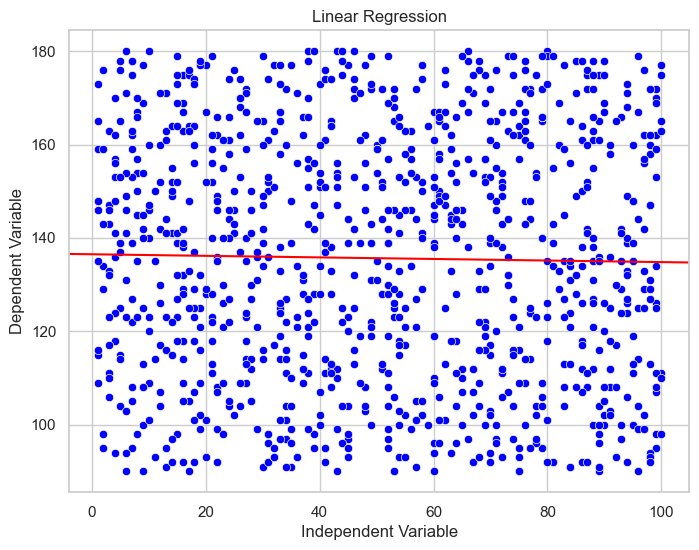

In [8]:
# Visualization for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['blood_pressure_systolic'], color='blue')
abline_plot(model_results=model_linear, ax=plt.gca(), color='red')
plt.title('Linear Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.savefig('linear_regression.png')
plt.show()

In [11]:
# Convert 'Yes' and 'No' in 'occurrence_y/n' to 1 and 0 respectively
df['occurrence_y/n'] = df['occurrence_y/n'].map({'Yes': 1, 'No': 0})

# Now, run the Logistic Regression
y_binary = df['occurrence_y/n']
model_logistic = sm.Logit(y_binary, X).fit()

# Display summary
print(model_logistic.summary())


Optimization terminated successfully.
         Current function value: 0.690926
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:         occurrence_y/n   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:               5.952e-05
Time:                        13:23:34   Log-Likelihood:                -690.93
converged:                       True   LL-Null:                       -690.97
Covariance Type:            nonrobust   LLR p-value:                    0.7743
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      0.127      0.796      0.426      -0.147       0.349
age            0.0006      0.

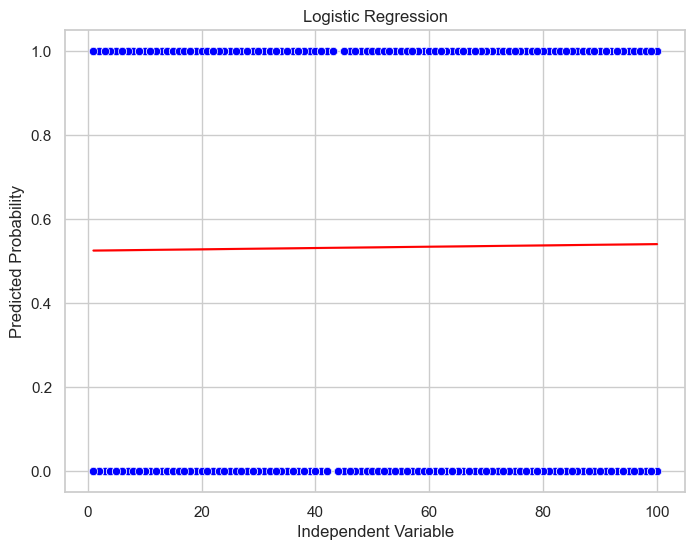

In [12]:
# Visualization for Logistic Regression (predicted probabilities)
df['predicted_prob'] = model_logistic.predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['occurrence_y/n'], color='blue')
sns.lineplot(x=df['age'], y=df['predicted_prob'], color='red')
plt.title('Logistic Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Predicted Probability')
plt.savefig('logistic_regression.png')
plt.show()